# Outliers

In [3]:
import pandas as pd
import uuid
import random
import numpy as np


In [4]:
df = pd.read_csv('10.0.dataset_health.csv')
df.head()

,id,age,poids,taille,genre,bmi,tension,cholesterol,glucide
0,0.0,40.0,84.0,183.0,M,25.1,133.0,237.0,116.0
1,1.0,40.0,83.0,162.0,M,31.6,132.0,222.0,131.0
2,2.0,52.0,62.0,161.0,F,23.9,139.0,227.0,111.0
3,3.0,63.0,70.0,185.0,M,20.5,119.0,212.0,106.0
4,4.0,43.0,58.0,160.0,F,22.7,146.0,232.0,101.0


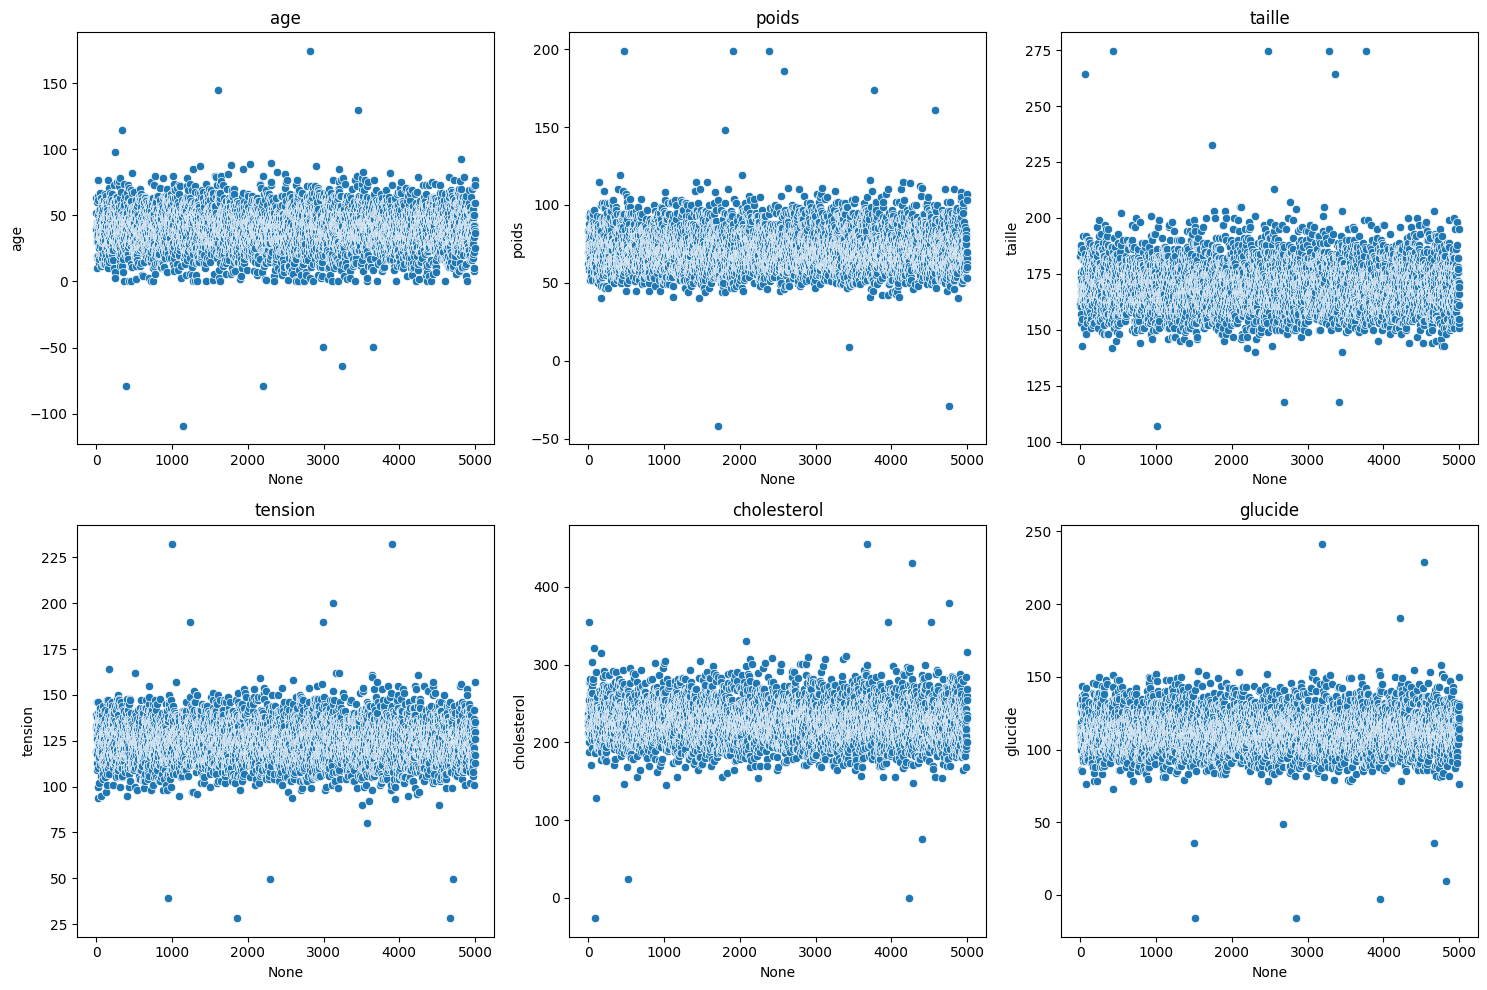

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['age', 'poids', 'taille', 'tension', 'cholesterol', 'glucide']

# make subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# plot histograms
for i, col in enumerate(cols):
    sns.scatterplot(x=df.index, y=df[col], data=df, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col}')
    
plt.tight_layout()
plt.show()

In [ ]:
# Age outliers ith z-scores 

# Calculate the z-score for each value in the 'age' column
z_scores = (df['age'] - df['age'].mean()) / df['age'].std()

# Find the indices of rows where the z-score is greater than 3 or less than -3
outlier_indices = z_scores[(z_scores < -3) | (z_scores > 3)].index

# Display the rows with outliers
print(df.loc[outlier_indices])

# Fill outliers values with mean()
# df.loc[outlier_indices, 'age'] = df['age'].mean()

# Remove outliers
# df_no_age_outliers = df.drop(outlier_indices)

        id         age  poids  taille genre   bmi  tension  cholesterol  \
242    242   98.000000  101.0   192.0     M  27.4    132.0        250.0   
345    345  114.678998   65.0   182.0     M  19.6    106.0        171.0   
392    392  -79.113037   84.0   173.0     M  28.1    123.0        223.0   
1144  1144 -108.927196   59.0   174.0     F  19.5    115.0        187.0   
1607  1607  144.493157   59.0   154.0     F  24.9    103.0        187.0   
1780  1780   88.000000   48.0   159.0     F  19.0    125.0        198.0   
2036  2036   89.000000   81.0   176.0     M  26.1    129.0        261.0   
2204  2204  -79.113037   69.0   147.0     F  31.9    134.0        261.0   
2308  2308   90.000000   63.0   159.0     F  24.9    119.0        245.0   
2827  2827  174.307317   68.0   158.0     F  27.2    109.0        201.0   
2998  2998  -49.298878   71.0   171.0     F  24.3    117.0        220.0   
3239  3239  -64.205957   74.0   163.0     F  27.9    132.0        231.0   
3457  3457  129.586078   

In [ ]:
# poids outliers With IQR

# Calculate the first and third quartiles
Q1 = df['poids'].quantile(0.25)
Q3 = df['poids'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the poids is an outlier
outlier_indices = df[(df['poids'] < Q1 - 1.5 * IQR) | (df['poids'] > Q3 + 1.5 * IQR)].index

# Display the rows with outliers
print(df.loc[outlier_indices])

# Fill outliers values with median()
# df.loc[outlier_indices, 'poids'] = df['poids'].median()

# Remove outliers
# df_no_poids_outliers = df.drop(outlier_indices)

        id   age       poids  taille genre   bmi  tension  cholesterol  \
148    148  49.0  115.000000   178.0     M  36.3    147.0        244.0   
208    208  44.0  109.000000   177.0     M  34.8    115.0        265.0   
394    394  39.0  110.000000   161.0     M  42.4    133.0        278.0   
413    413  48.0  119.000000   158.0     M  47.7    127.0        210.0   
455    455  27.0  109.000000   177.0     M  34.8    126.0        269.0   
466    466  55.0  198.807858   156.0     F  28.8    110.0        146.0   
1414  1414  63.0  109.000000   177.0     M  34.8    123.0        269.0   
1419  1419  45.0  115.000000   179.0     M  35.9    115.0        228.0   
1470  1470  62.0  110.000000   167.0     M  39.4    141.0        247.0   
1572  1572  29.0  115.000000   163.0     M  43.3    132.0        290.0   
1718  1718  41.0  -41.593172   169.0     M  27.7    123.0        244.0   
1799  1799  50.0  148.197115   159.0     F  24.5    139.0        210.0   
1847  1847  23.0  110.000000   180.0  

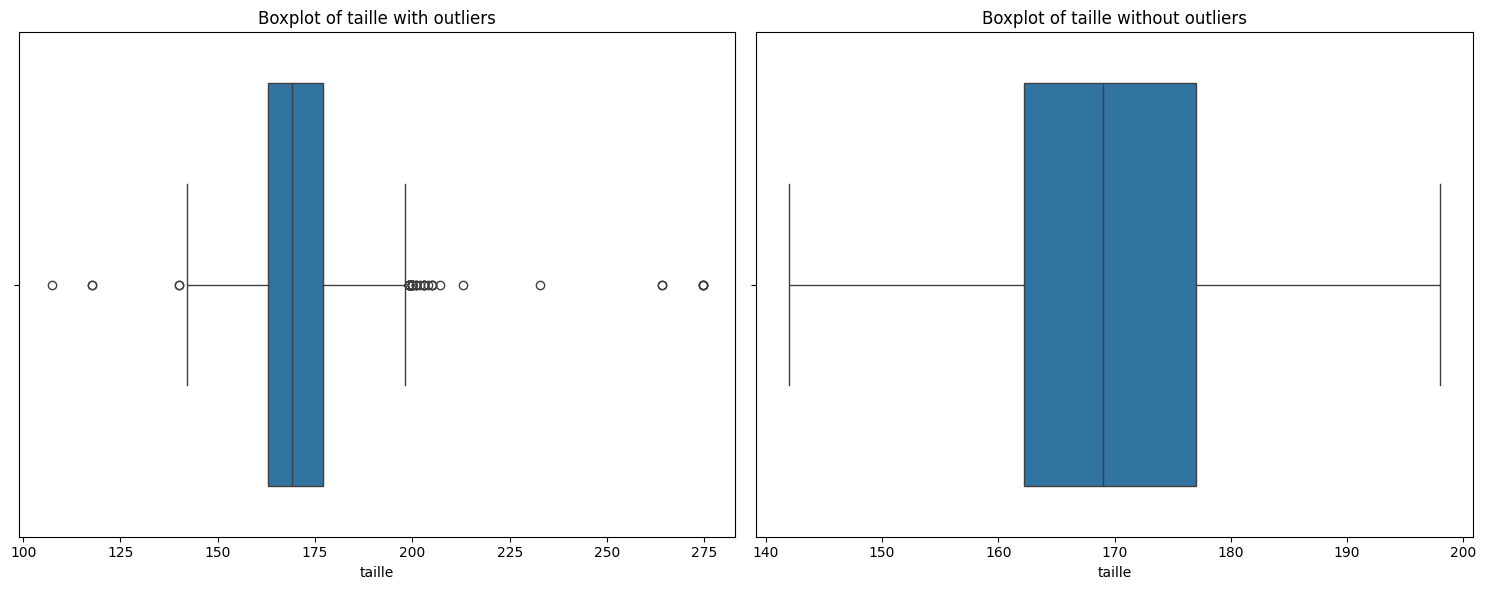

In [ ]:
# taille outliers with boxplot

# Create a boxplot of the 'taille' column
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['taille'])
plt.title('Boxplot of taille with outliers')

# Q1 and Q3
Q1 = df['taille'].quantile(0.25)
Q3 = df['taille'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Find the indices of rows where the taille is an outlier
outlier_indices = df[(df['taille'] < Q1 - 1.5 * IQR) | (df['taille'] > Q3 + 1.5 * IQR)].index

# Plot the taille distribution without outliers
df_no_loyalty_outliers = df.drop(outlier_indices)
plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_loyalty_outliers['taille'])
plt.title('Boxplot of taille without outliers')

plt.tight_layout()
plt.show()


# Matrice de corrélation

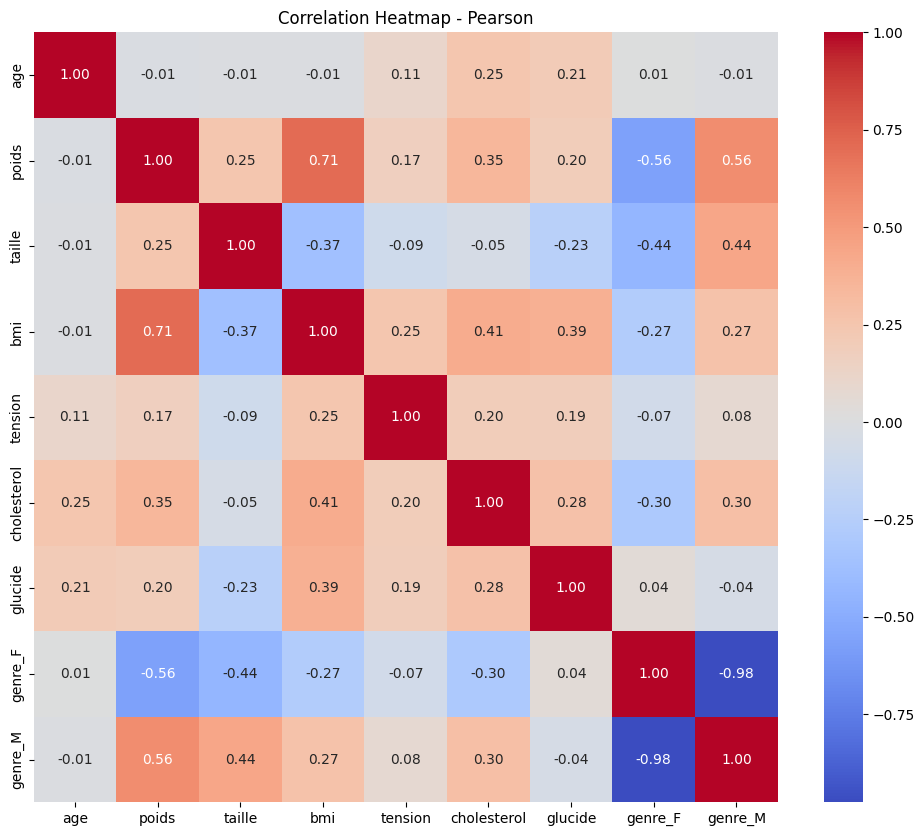

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame structure
# df = pd.DataFrame(...) # Assuming your DataFrame is already loaded

# One-hot encode categorical columns
encoded_df = pd.get_dummies(
    df.drop(columns=["id"]),  # Drop identifier column
    columns=["genre"],
    # drop_first=True  # Avoid multicollinearity
)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr(method="pearson")
# correlation_matrix = encoded_df.corr(method="spearman") # For Spearman correlation

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap - Pearson")
plt.show()


# Bivariate analysis

### age / poids

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

df_cleaned = df.dropna(subset=['age', 'poids'])

# Prepare the data
X = df_cleaned[['age']]  # Independent variable (age)
y = df_cleaned['poids']  # Dependent variable (poids)

# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the poids using the model
y_pred = model.predict(X)

# Example: Predict poids for a specific age
age_to_predict = 35
age_df = pd.DataFrame({'age': [age_to_predict]})
predicted_poids = model.predict(age_df)

print(f"Predicted poids for age {age_to_predict}: {predicted_poids[0]}")

Predicted poids for age 35: 72.4319635490334


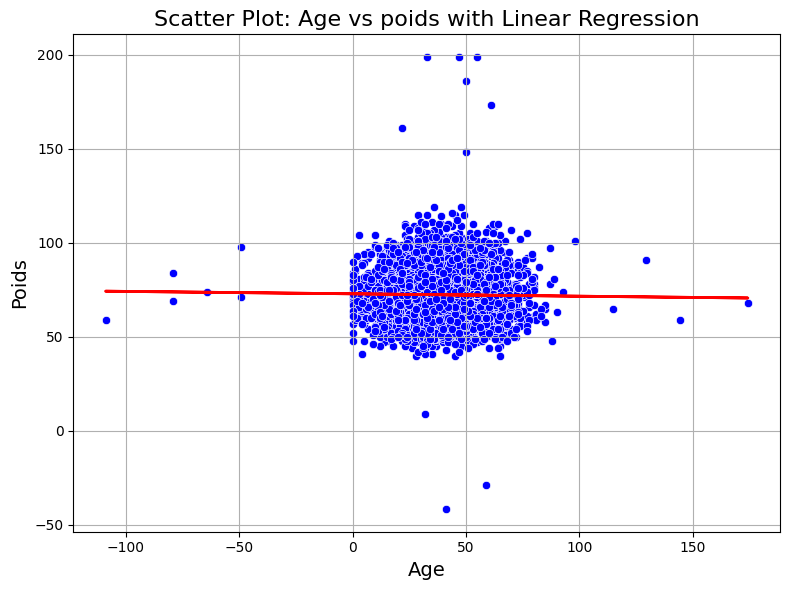

In [ ]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='poids', data=df_cleaned, color='blue')

# Plot the regression line
plt.plot(df_cleaned['age'], y_pred, color='red', linewidth=2)

# Add title and labels
plt.title('Scatter Plot: Age vs poids with Linear Regression', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Poids', fontsize=14)

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


### Gender / Poids Type Analysis

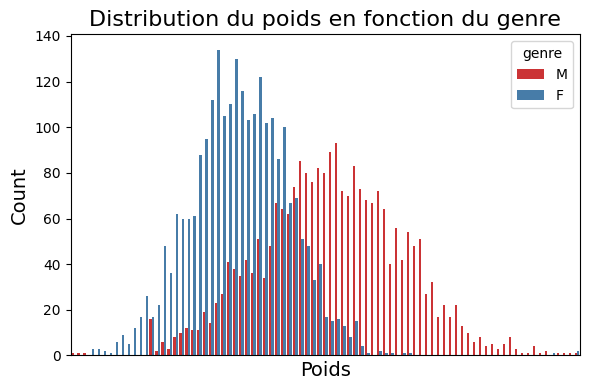

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'gender' and 'article_type' columns

plt.figure(figsize=(6, 4))

# Create a count plot for gender and article_type
sns.countplot(x='poids', hue='genre', data=df, palette='Set1')

# Add title and labels
plt.title('Distribution du poids en fonction du genre', fontsize=16)
plt.xlabel('Poids', fontsize=14)
plt.ylabel('Count', fontsize=14)
# no xticks
plt.xticks([])

# Show plot
plt.tight_layout()
plt.show()


In [ ]:
df.columns

Index(['id', 'age', 'poids', 'taille', 'genre', 'bmi', 'tension',
       'cholesterol', 'glucide'],
      dtype='object')

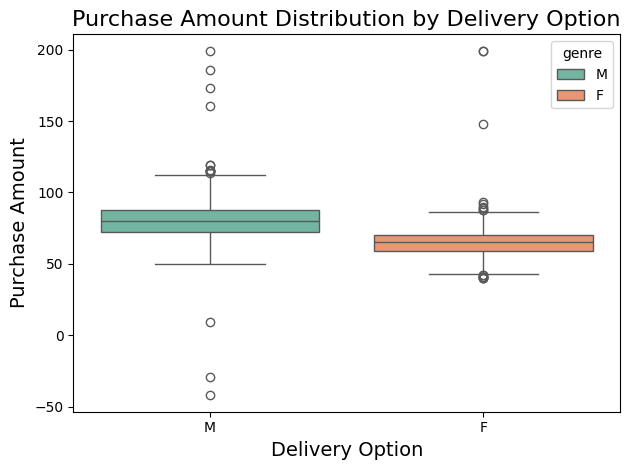

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing 'purchase_amount' and 'delivery_options'

# Create a box plot for purchase_amount and delivery_options
sns.boxplot(x='genre', y='poids', data=df, hue='genre', palette='Set2')

# Add title and labels
plt.title('Purchase Amount Distribution by Delivery Option', fontsize=16)
plt.xlabel('Delivery Option', fontsize=14)
plt.ylabel('Purchase Amount', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()
